In [1]:
import keras
import keras.backend as K
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed, Flatten
from keras.layers import LSTM, GRU, RNN
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from google.colab import files
# upload polution_dataSet.npy file
uploaded = files.upload()
# import data into a dataframe
import io
data = np.load(io.BytesIO(uploaded['polution_dataSet.npy']))

Saving polution_dataSet.npy to polution_dataSet (4).npy


In [0]:
'''
IN this part data for test, validation and train is preperd.
'''
# data format is : pollution  ,dew  ,temp  , press ,wnd_dir , wnd_spd , snow , rain
# total data =43000
# per day and week = 43000/24*7 =250

SAMPLE_DISTANCE = 24      # if 1 sample per hour, if 24 per day, if 24*7 per week
TRAIN_SIZE = 1000
VAL_SIZE = 500
TEST_SIZE = 200
TIMESTEPS = 7             # timesteps used for a single prediction (here each timestep is a day)
HOUR = 2                  # which hour of day ? (0-23) (not so important)

In [0]:
x_train = []
y_train = []
for i in range(TRAIN_SIZE):
    x_train.append(np.array(data[i*SAMPLE_DISTANCE+HOUR:i*SAMPLE_DISTANCE+TIMESTEPS+HOUR]))
    y_train.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS+HOUR, 0]))
x_train = np.array(x_train)
y_train = np.array(y_train)

In [0]:
x_val = []
y_val = []
for i in range(TRAIN_SIZE, TRAIN_SIZE+VAL_SIZE):
    x_val.append(np.array(data[i*SAMPLE_DISTANCE+HOUR:i*SAMPLE_DISTANCE+TIMESTEPS+HOUR]))
    y_val.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS+HOUR, 0]))
x_val = np.array(x_val)
y_val = np.array(y_val)

In [0]:
x_test = []
y_test = []
for i in range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE):
    x_test.append(np.array(data[i*SAMPLE_DISTANCE+HOUR:i*SAMPLE_DISTANCE+TIMESTEPS+HOUR]))
    y_test.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS+HOUR, 0]))
x_test = np.array(x_test)
y_test = np.array(y_test)
y_total = np.concatenate([y_train, y_val, y_test], axis=None)

In [0]:
'''
In this part network is implemented 
'''
# parameters
BATCH_SIZE = 10
NUM_EPOCHS = 20
HIDDEN_SIZE = 40

In [0]:
from keras import backend
K.clear_session()
# keras modeling
model = Sequential()
model.add(GRU(HIDDEN_SIZE,  input_shape=(TIMESTEPS, 8), return_sequences=False,activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 40)                5880      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 5,921
Trainable params: 5,921
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1, validation_data=(x_val, y_val))

Train on 1000 samples, validate on 500 samples
Epoch 1/20
1000/1000 [==============================] - 1s 944us/step - loss: 0.0446 - val_loss: 0.0199
Epoch 2/20
1000/1000 [==============================] - 0s 454us/step - loss: 0.0196 - val_loss: 0.0176
Epoch 3/20
1000/1000 [==============================] - 0s 457us/step - loss: 0.0178 - val_loss: 0.0172
Epoch 4/20
1000/1000 [==============================] - 0s 450us/step - loss: 0.0179 - val_loss: 0.0254
Epoch 5/20
1000/1000 [==============================] - 0s 444us/step - loss: 0.0199 - val_loss: 0.0182
Epoch 6/20
1000/1000 [==============================] - 0s 444us/step - loss: 0.0176 - val_loss: 0.0142
Epoch 7/20
1000/1000 [==============================] - 0s 443us/step - loss: 0.0153 - val_loss: 0.0160
Epoch 8/20
1000/1000 [==============================] - 0s 443us/step - loss: 0.0149 - val_loss: 0.0134
Epoch 9/20
1000/1000 [==============================] - 0s 442us/step - loss: 0.0144 - val_loss: 0.0133
Epoch 10/20
1000/

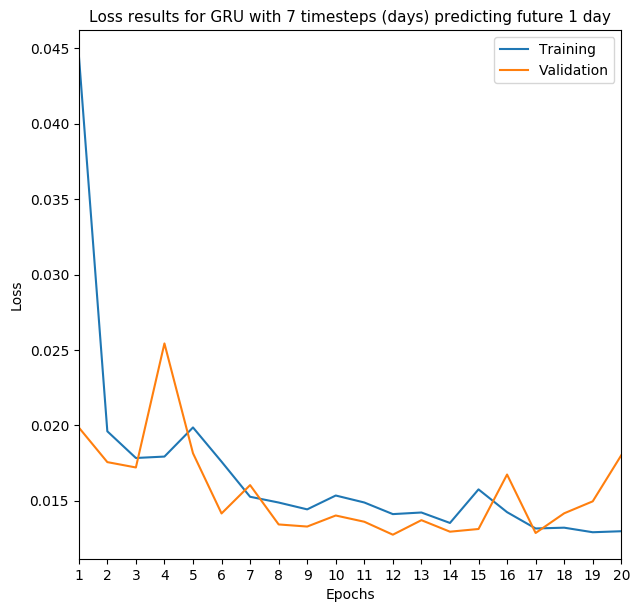

In [11]:
plt.figure(1, figsize=(7, 7), dpi=100)
plt.style.use(['default'])
plt.plot(np.arange(1,NUM_EPOCHS+1,1), history.history['loss'], label='Training')
plt.plot(np.arange(1,NUM_EPOCHS+1,1), history.history['val_loss'], label='Validation')
plt.xticks(np.arange(1, NUM_EPOCHS+1, 1, dtype=int))
plt.xlim(1, NUM_EPOCHS)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss results for GRU with 7 timesteps (days) predicting future 1 day', fontsize=11)
plt.legend()
plt.show()

In [12]:
print('train loss history:', history.history["loss"])
print('test loss history:', history.history["val_loss"])
scores = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=1)
print('\nTest result loss: %.3f' % (scores))

train loss history: [0.044611746883019804, 0.01961131572723389, 0.01784147239755839, 0.01793546193279326, 0.019866604097187518, 0.017598717818036676, 0.015270298644900322, 0.014888312176335603, 0.014435213776305317, 0.01535308398772031, 0.014890657970681787, 0.01412043286021799, 0.014227030426263809, 0.013533783797174691, 0.01575934266904369, 0.014249684005044401, 0.013168171891011297, 0.01322058821329847, 0.012918371711857618, 0.012985282535664737]
test loss history: [0.019865594739094376, 0.017568006748333573, 0.017212996808812022, 0.025436511784791945, 0.01815611369907856, 0.014163643559440971, 0.01604326699860394, 0.013435182133689523, 0.01329561352264136, 0.014028240339830517, 0.013614461645483971, 0.01275533964857459, 0.013719071792438626, 0.012954974342137575, 0.013133809072896838, 0.01674490187317133, 0.012868313896469773, 0.014173684427514672, 0.01496715096756816, 0.01802364715375006]
200/200 [==============================] - 0s 134us/step

Test result loss: 0.016


In [0]:
y_train = model.predict(x_train, batch_size=BATCH_SIZE)
y_val = model.predict(x_val, batch_size=BATCH_SIZE)
y_pred = model.predict(x_test, batch_size=BATCH_SIZE)

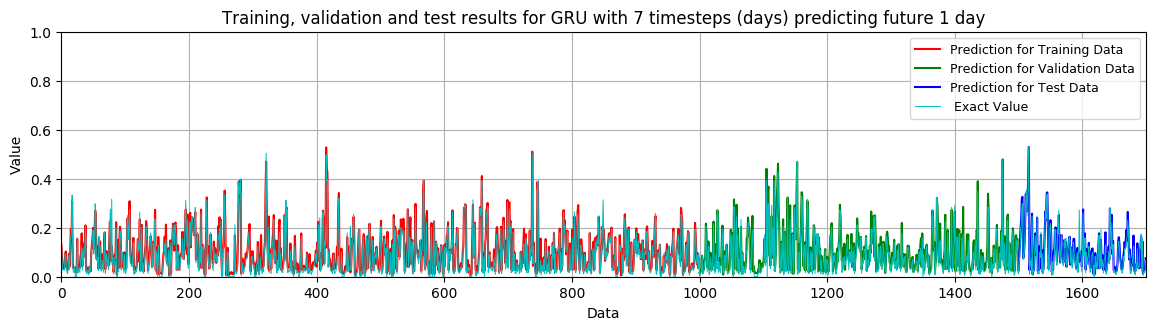

In [14]:
plt.figure(2, figsize=(14, 7), dpi=100)
plt.style.use(['default'])
plt.subplot(211)
plt.plot(range(0, TRAIN_SIZE), y_train, c='r', linewidth=1.5, label='Prediction for Training Data')
plt.plot(range(TRAIN_SIZE, TRAIN_SIZE+VAL_SIZE), y_val, c='g', linewidth=1.5, label='Prediction for Validation Data')
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_pred, c='b', linewidth=1.5, label='Prediction for Test Data')
plt.plot(range(0, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_total, c='c', linewidth=0.7, label=' Exact Value')
plt.xlim(0, TRAIN_SIZE+VAL_SIZE+TEST_SIZE)
plt.ylim(0, 1)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Training, validation and test results for GRU with 7 timesteps (days) predicting future 1 day')
plt.legend(loc='best', fontsize=9)
plt.grid(True)
plt.show()

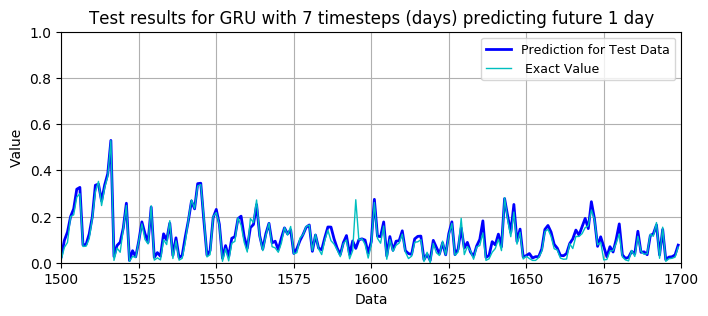

In [15]:
plt.figure(3, figsize=(8, 3), dpi=100)
plt.style.use(['default'])
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_pred, 'b', linewidth=2, label='Prediction for Test Data')
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_total[TRAIN_SIZE+VAL_SIZE:TRAIN_SIZE+VAL_SIZE+TEST_SIZE], c='c', linewidth=1, label=' Exact Value')
plt.xlim(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE)
plt.ylim(0, 1)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Test results for GRU with 7 timesteps (days) predicting future 1 day')
plt.grid(True)
plt.legend(loc='best', fontsize=9)
plt.show()